In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced data visualization

# Read the dataset from Excel file
Dataset = pd.read_excel(
    "D:/Aryan Data/Usefull Data/Semester - 4/Data Visulization and Dashboards/Lab Manual/Exp-5 Creating bar plot stacked bar and histogram/Sample - Superstore.xlsx",
    "Orders",
)

# Convert 'Order Date' column to datetime format
Dataset["Order Date"] = pd.to_datetime(Dataset["Order Date"])

# Extract the quarter from 'Order Date' and create a new column 'Quarter'
Dataset["Quarter"] = Dataset["Order Date"].dt.quarter

Index(['Row ID', 'Order ID', 'Order Date', 'Month', 'Year', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Quarter'],
      dtype='object')


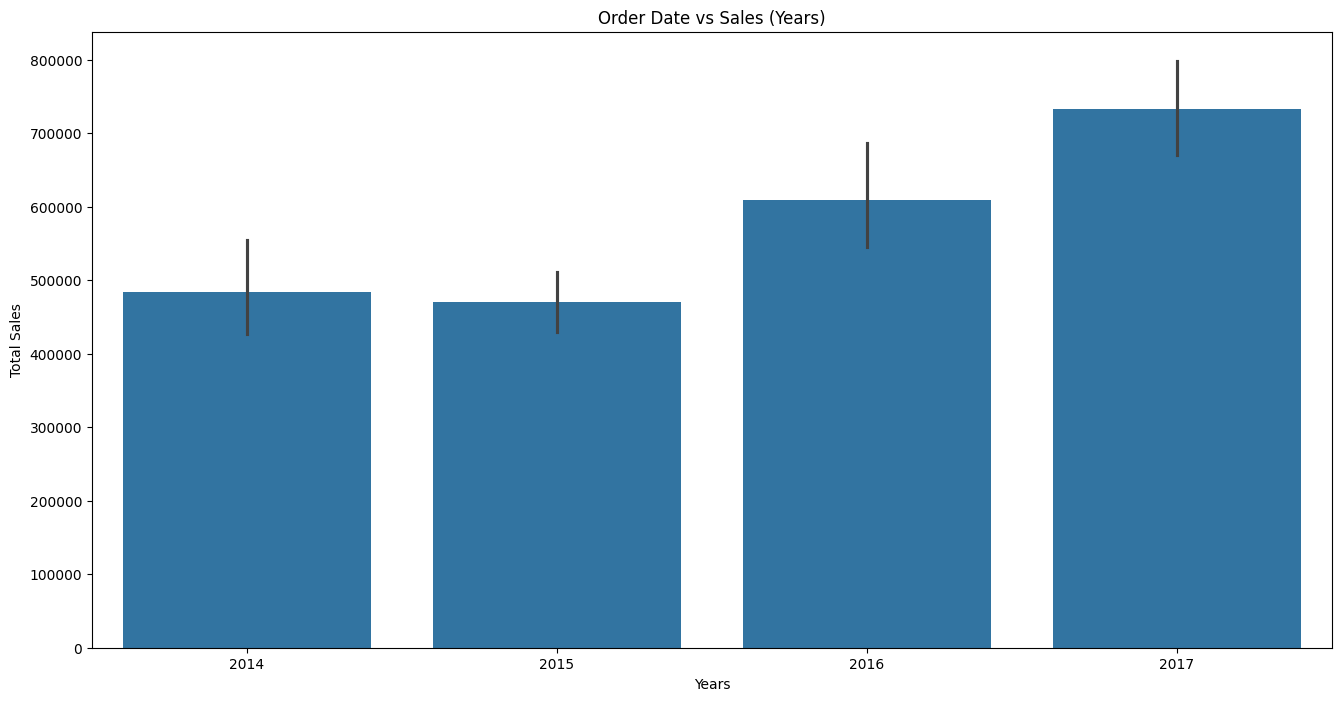

In [30]:
# Question - 1: Draw a bar chart using superstore data (Order Date vs. Sales)

# Set the figure size for the plot
plt.figure(figsize=(16, 8))

# Create a bar chart with Order Date on the x-axis and Sales on the y-axis, aggregated by sum
sns.barplot(x="Year", y="Sales", data=Dataset, estimator=sum)

# Label the x and y axes
plt.xlabel("Years")
plt.ylabel("Total Sales")

# Set the title of the plot
plt.title("Order Date vs Sales (Years)")

# Display the plot
plt.show()

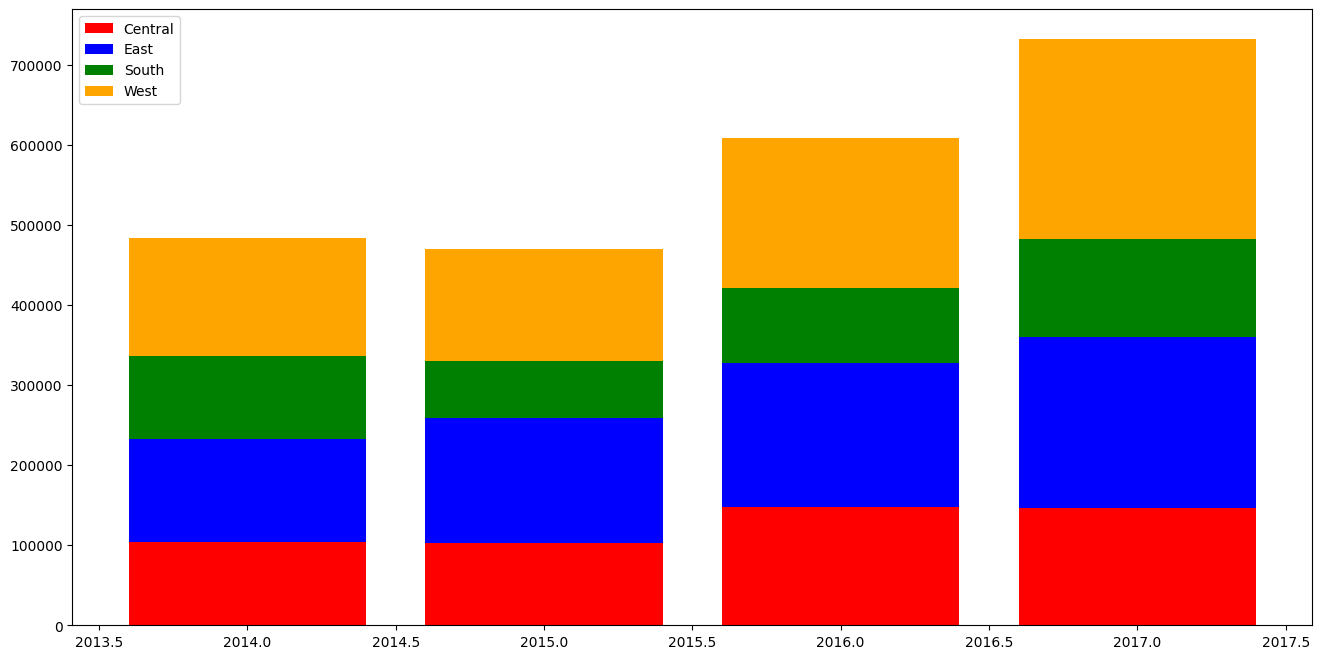

In [29]:
# Question - 2: Draw a Stacked Bar Chart using superstore data
# (Order Date vs. Sales, considering Region dimension)

# Group the dataset by Year and Region, summing up Sales
New_Dataset = Dataset.groupby(["Year", "Region"])["Sales"].sum().reset_index()

# Extract sales data for each region and year
Central_Sales = []
East_Sales = []
South_Sales = []
West_Sales = []

# Iterate through the grouped data to extract sales values
for i in range(0, 16, 4):
    Central_Sales.append(New_Dataset.iloc[i, 2])

for i in range(1, 16, 4):
    East_Sales.append(New_Dataset.iloc[i, 2])

for i in range(2, 16, 4):
    South_Sales.append(New_Dataset.iloc[i, 2])

for i in range(3, 16, 4):
    West_Sales.append(New_Dataset.iloc[i, 2])

# Define years for x-axis
Year = [2014, 2015, 2016, 2017]

# Convert the lists to NumPy arrays for plotting
Central_Sales = np.array(Central_Sales)
East_Sales = np.array(East_Sales)
South_Sales = np.array(South_Sales)
West_Sales = np.array(West_Sales)

# Create a figure with the specified size
plt.figure(figsize=(16, 8))

# Plot stacked bar chart for each region
plt.bar(Year, Central_Sales, color="red")
plt.bar(Year, East_Sales, bottom=Central_Sales, color="blue")
plt.bar(Year, South_Sales, bottom=Central_Sales + East_Sales, color="green")
plt.bar(
    Year, West_Sales, bottom=Central_Sales + East_Sales + South_Sales, color="orange"
)

# Add legend to the plot
plt.legend(["Central", "East", "South", "West"])

# Display the plot
plt.show()

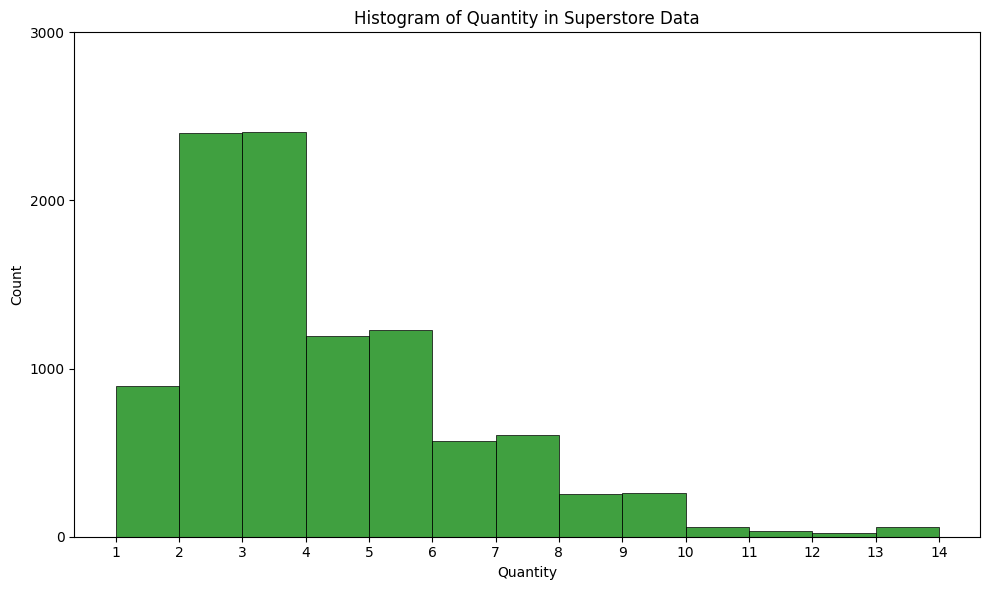

In [3]:
# Question - 3: Draw a histogram chart using superstore data

# Set appropriate figure size based on image dimensions
plt.figure(figsize=(10, 6))  # Adjusted from (12, 6)

# Create histogram with specific bins and styling
sns.histplot(
    Dataset["Quantity"],
    bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],  # Define bin edges
    kde=False,  # Turn off Kernel Density Estimate
    color="green",
    linewidth=0.5,  # Adjust linewidth if needed
    edgecolor="black",  # Add edge lines for clarity
)

# Set labels and title
plt.title("Histogram of Quantity in Superstore Data")
plt.xlabel("Quantity")
plt.ylabel("Count")

# Customize ticks for better readability
plt.xticks(
    ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
)  # Adjusted tick positions
plt.yticks(
    ticks=[0, 1000, 2000, 3000]
)  

# Adjust layout for clarity
plt.tight_layout()

# Display the plot
plt.show()